In [54]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model,metrics

In [62]:
data = pd.read_csv("PRSA_data")

data= pd.DataFrame(data)

In [63]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [64]:
data=data[['year','month','hour','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']]

In [65]:
data.head()

,year,month,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010,1,0,NaN,-21,-11.0,1021.0,1.79,0,0
1,2010,1,1,NaN,-21,-12.0,1020.0,4.92,0,0
2,2010,1,2,NaN,-21,-11.0,1019.0,6.71,0,0
3,2010,1,3,NaN,-21,-14.0,1019.0,9.84,0,0
4,2010,1,4,NaN,-20,-12.0,1018.0,12.97,0,0


In [66]:
data.shape

(43824, 10)

In [67]:
data.describe()

,year,month,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [68]:
data.isnull().sum()

year        0
month       0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
Iws         0
Is          0
Ir          0
dtype: int64

<Figure size 1728x792 with 0 Axes>

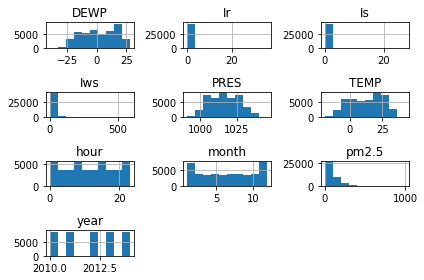

In [69]:
fig=plt.figure(figsize=(24,11))
data.hist()
plt.tight_layout()
plt.show()

In [70]:
corr=data.corr()
corr

,year,month,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
year,1.000000e+00,-3.575502e-16,0.000000e+00,-0.014690,0.001122,0.045529,-0.012570,-0.064244,-0.017002,-0.024383
month,-3.575502e-16,1.000000e+00,-1.528210e-17,-0.024069,0.233975,0.170093,-0.062185,0.003043,-0.061672,0.036737
hour,0.000000e+00,-1.528210e-17,1.000000e+00,-0.023116,-0.020988,0.150066,-0.041928,0.056618,-0.002374,-0.006286
pm2.5,-1.469020e-02,-2.406878e-02,-2.311644e-02,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,1.121574e-03,2.339746e-01,-2.098769e-02,0.171423,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,4.552854e-02,1.700926e-01,1.500656e-01,-0.090534,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-1.257001e-02,-6.218507e-02,-4.192788e-02,-0.047282,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,-6.424368e-02,3.043299e-03,5.661776e-02,-0.247784,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122
Is,-1.700207e-02,-6.167206e-02,-2.373592e-03,0.019266,-0.034410,-0.092601,0.069028,0.021883,1.000000,-0.009548
Ir,-2.438290e-02,3.673715e-02,-6.286241e-03,-0.051369,0.125090,0.049121,-0.079843,-0.010122,-0.009548,1.000000


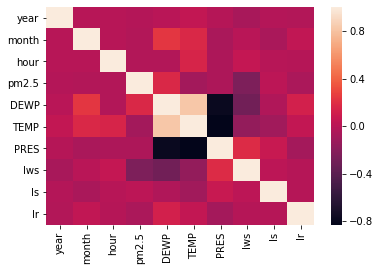

In [71]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

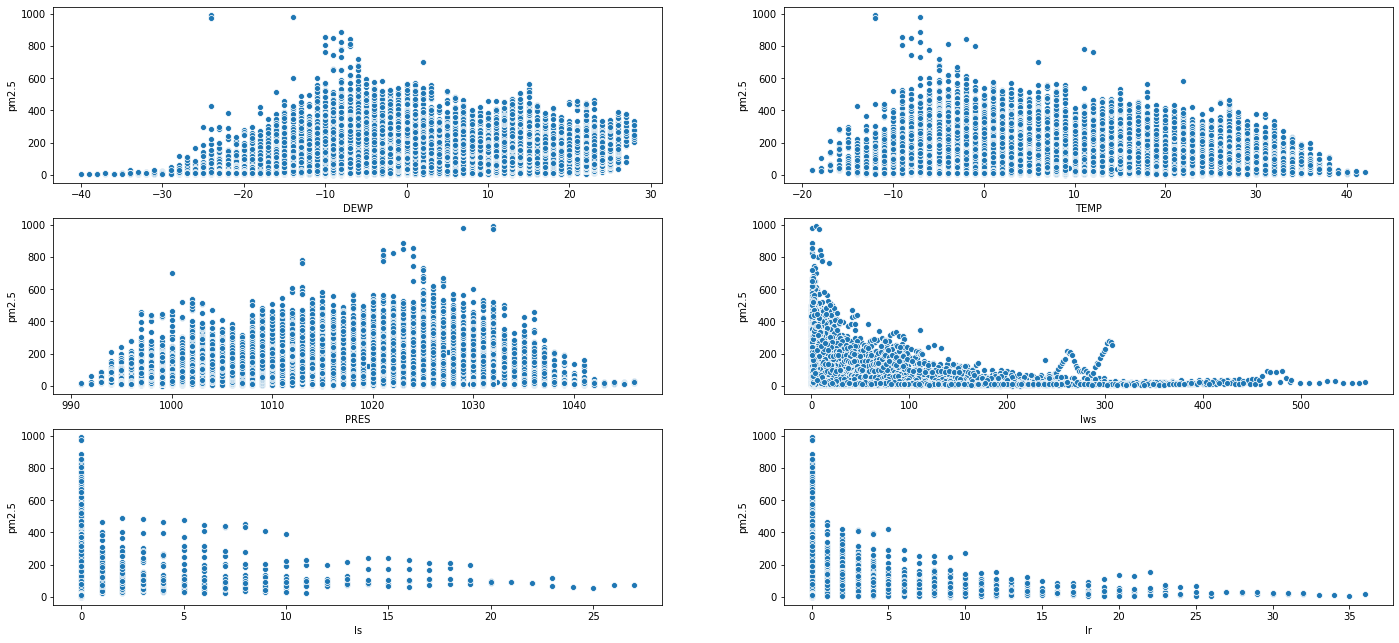

In [72]:
fig1=plt.figure(figsize=(24,11))
a1=fig1.add_subplot(321)
a2=fig1.add_subplot(322)
a3=fig1.add_subplot(323)
a4=fig1.add_subplot(324)
a5=fig1.add_subplot(325)
a6=fig1.add_subplot(326)
sns.scatterplot(x='DEWP',y='pm2.5',data=data,ax=a1)
sns.scatterplot(x='TEMP',y='pm2.5',data=data,ax=a2)
sns.scatterplot(x='PRES',y='pm2.5',data=data,ax=a3)
sns.scatterplot(x='Iws',y='pm2.5',data=data,ax=a4)
sns.scatterplot(x='Is',y='pm2.5',data=data,ax=a5)
sns.scatterplot(x='Ir',y='pm2.5',data=data,ax=a6)

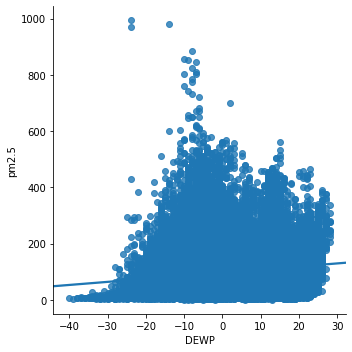

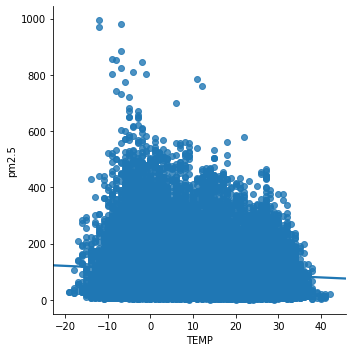

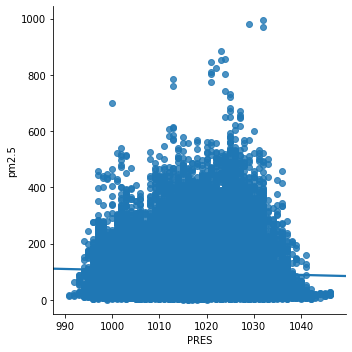

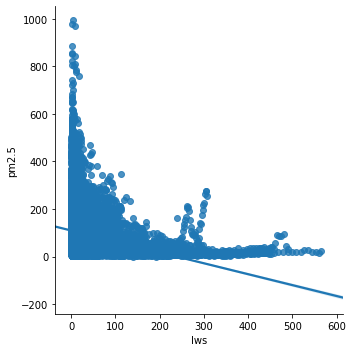

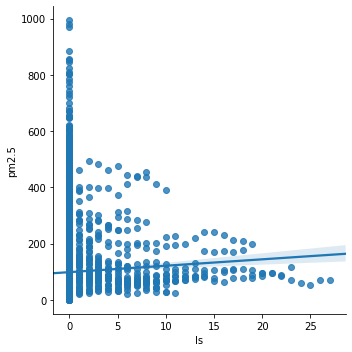

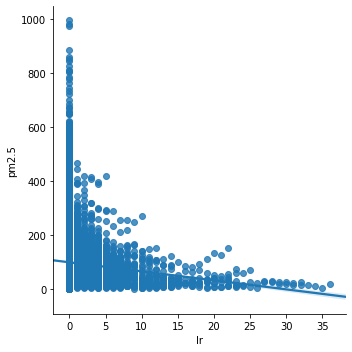

In [73]:
sns.lmplot(x='DEWP',y='pm2.5',data=data)
sns.lmplot(x='TEMP',y='pm2.5',data=data)
sns.lmplot(x='PRES',y='pm2.5',data=data)
sns.lmplot(x='Iws',y='pm2.5',data=data)
sns.lmplot(x='Is',y='pm2.5',data=data)
sns.lmplot(x='Ir',y='pm2.5',data=data)

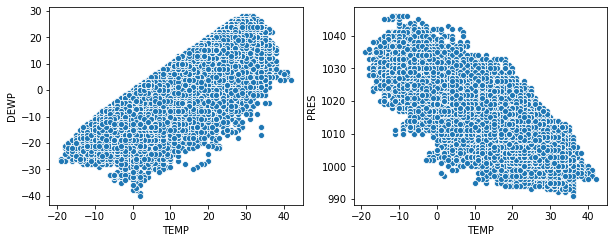

In [74]:
fig1=plt.figure(figsize=(10,8))
a1=fig1.add_subplot(221)
a2=fig1.add_subplot(222)
#a3=fig1.add_subplot(223)
#a4=fig1.add_subplot(224)
sns.scatterplot(x='TEMP',y='DEWP',data=data,ax=a1)
sns.scatterplot(x='TEMP',y='PRES',data=data,ax=a2)

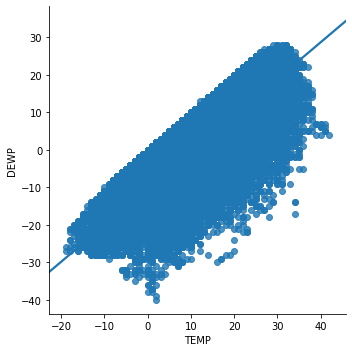

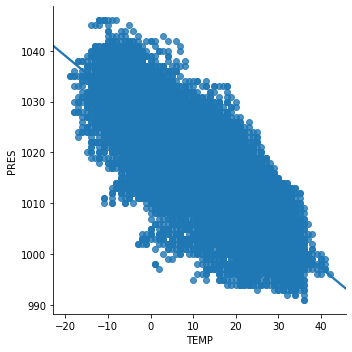

In [75]:
sns.lmplot(x='TEMP',y='DEWP',data=data)
sns.lmplot(x='TEMP',y='PRES',data=data)

In [76]:
data.hour = range(0,43824)
data

,year,month,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010,1,0,NaN,-21,-11.0,1021.0,1.79,0,0
1,2010,1,1,NaN,-21,-12.0,1020.0,4.92,0,0
2,2010,1,2,NaN,-21,-11.0,1019.0,6.71,0,0
3,2010,1,3,NaN,-21,-14.0,1019.0,9.84,0,0
4,2010,1,4,NaN,-20,-12.0,1018.0,12.97,0,0
5,2010,1,5,NaN,-19,-10.0,1017.0,16.10,0,0
6,2010,1,6,NaN,-19,-9.0,1017.0,19.23,0,0
7,2010,1,7,NaN,-19,-9.0,1017.0,21.02,0,0
8,2010,1,8,NaN,-19,-9.0,1017.0,24.15,0,0
9,2010,1,9,NaN,-20,-8.0,1017.0,27.28,0,0


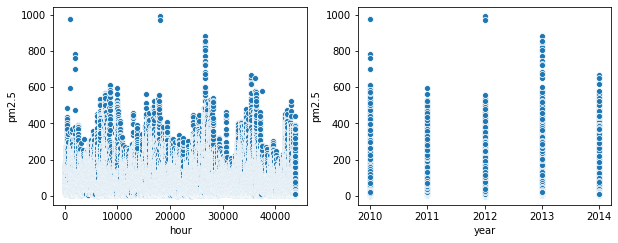

In [77]:
fig1=plt.figure(figsize=(10,8))
a1=fig1.add_subplot(221)
a2=fig1.add_subplot(222)
sns.scatterplot(y='pm2.5',x='hour',data=data,ax=a1)
sns.scatterplot(y='pm2.5',x='year',data=data,ax=a2)

In [78]:
from sklearn.model_selection import train_test_split


In [92]:
data.fillna(98.613215,inplace=True)  #98.613215 is average value

data

,year,month,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010,1,89,98.613215,-21,-11.0,1021.0,1.79,0,0
1,2010,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0
2,2010,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0
3,2010,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0
4,2010,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0
5,2010,1,5,98.613215,-19,-10.0,1017.0,16.10,0,0
6,2010,1,6,98.613215,-19,-9.0,1017.0,19.23,0,0
7,2010,1,7,98.613215,-19,-9.0,1017.0,21.02,0,0
8,2010,1,8,98.613215,-19,-9.0,1017.0,24.15,0,0
9,2010,1,9,98.613215,-20,-8.0,1017.0,27.28,0,0


In [134]:
x=data[['Iws']]
y=data['pm2.5']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=90)

In [135]:
regre=linear_model.LinearRegression()

In [136]:
regre.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
regre.score(train_x,train_y)


0.05647897814975811

In [138]:
regre.coef_[0]

-0.4259548501814871

In [139]:
regre.intercept_

108.83546380318553

In [140]:
predict_y=regre.predict(test_x)

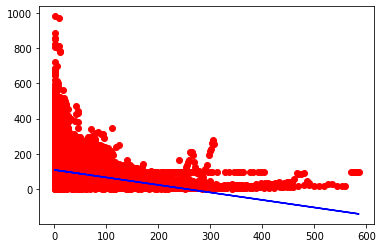

In [142]:
plt.scatter(train_x,train_y,color='r')
plt.plot(train_x,regre.coef_[0]*train_x + regre.intercept_,'-b')
plt.show()

In [143]:
metrics.mean_squared_error(test_y,predict_y)

7644.640859201479